In [0]:
%matplotlib inline
import os, argparse
import cv2,spacy, numpy as np
from keras.models import model_from_json
from keras.optimizers import Adam,SGD
from sklearn.externals import joblib

In [2]:
!pip install spacy


    100% |████████████████████████████████| 17.6MB 1.8MB/s 
    100% |████████████████████████████████| 92kB 22.1MB/s 
    100% |████████████████████████████████| 1.2MB 15.3MB/s 
    100% |████████████████████████████████| 51kB 15.5MB/s 
    100% |████████████████████████████████| 194kB 22.0MB/s 
    100% |████████████████████████████████| 153kB 23.0MB/s 
    100% |████████████████████████████████| 604kB 16.3MB/s 
    100% |████████████████████████████████| 51kB 13.3MB/s 
    100% |████████████████████████████████| 389kB 19.5MB/s 
    100% |████████████████████████████████| 143kB 23.0MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / - \

 | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132fb649a6bbcab22487e4147880a55b0dd0f4b18fdfd6b5
  Running setup.py bdist_wheel for thinc ..

 | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/f8/b1/86/c92e4d36b690208fff8471711b85eaa6bc6d19860a86199a09
  Running setup.py bdist_wheel for msgpack-python ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built spacy murmurhash cymem preshed thinc pathlib ujson dill regex wrapt cytoolz msgpack-python


In [6]:
!git clone https://github.com/iamaaditya/VQA_Demo


Cloning into 'VQA_Demo'...
remote: Counting objects: 136, done.
remote: Total 136 (delta 0), reused 0 (delta 0), pack-reused 136
Receiving objects: 100% (136/136), 97.48 MiB | 38.95 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [0]:
VQA_model_file_name      = 'models/VQA/VQA_MODEL.json'
VQA_weights_file_name   = 'models/VQA/VQA_MODEL_WEIGHTS.hdf5'
label_encoder_file_name  = 'models/VQA/FULL_labelencoder_trainval.pkl'
CNN_weights_file_name   = 'models/CNN/vgg16_weights.h5'

In [7]:
cd VQA_Demo/

/content/VQA_Demo


In [8]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

Using TensorFlow backend.


In [11]:
image_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=image_model.input, outputs=image_model.get_layer('fc2').output)
# this is standard VGG 16 without the last two layers
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# one may experiment with "adam" optimizer, but the loss function for
# this kind of task is pretty standard
model.compile(optimizer=sgd, loss='categorical_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

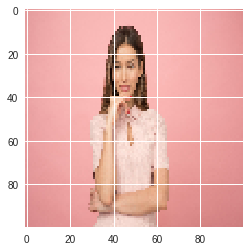

In [13]:
test_img='pexels-photo-1036623.jpeg'
import matplotlib.pyplot as plt
from keras.preprocessing import image
img=image.load_img(test_img, target_size=(100,100))

plt.imshow(img)

In [0]:
image_features = np.zeros((1, 4096))
# Magic_Number = 4096  > Comes from last layer of VGG Model

# Since VGG was trained as a image of 224x224, every new image
# is required to go through the same transformation
im = cv2.resize(cv2.imread(test_img), (224, 224))
#   im = im.transpose((2,0,1)) # convert the image to RGBA

    
# this axis dimension is required because VGG was trained on a dimension
    # of 1, 3, 224, 224 (first axis is for the batch size
    # even though we are using only one image, we have to keep the dimensions consistent
im = np.expand_dims(im, axis=0) 

image_features[0,:] = model.predict(im)[0]

In [0]:
question1=u'which color hair?'
question2=u'who is in the picture ?'

In [0]:
word_embeddings = spacy.load('en', vectors='en_glove_cc_300_1m_vectors')


In [18]:
#!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 71.2MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [19]:
#!python -m spacy download en_vectors_web_lg

    100% |████████████████████████████████| 661.8MB 72.8MB/s 
  Running setup.py install for en-vectors-web-lg ... - \ | / - \ | / - \ done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_vectors_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_vectors_web_lg

    You can now load the model via spacy.load('en_vectors_web_lg')



In [0]:
word_embeddings = spacy.load('en_vectors_web_lg')
tokens_1 = word_embeddings(question1)
tokens_2 = word_embeddings(question2)


question_tensor_1 = np.zeros((1, 30, 300))
question_tensor_2 = np.zeros((1, 30, 300))

for j in range(len(tokens_1)):
    question_tensor_1[0,j,:] = tokens_1[j].vector
for j in range(len(tokens_2)):
    question_tensor_2[0,j,:] = tokens_2[j].vector    

In [22]:
from keras.models import Sequential
from keras.layers.core import Reshape, Activation, Dropout
from keras.layers import LSTM, Merge, Dense


image_feature_size          = 4096
word_feature_size           = 300
number_of_LSTM              = 3
number_of_hidden_units_LSTM = 512
max_length_questions        = 30
number_of_dense_layers      = 3
number_of_hidden_units      = 1024
activation_function         = 'tanh'
dropout_pct                 = 0.5


# Image model
model_image = Sequential()
model_image.add(Reshape((image_feature_size,), input_shape=(image_feature_size,)))

# Language Model
model_language = Sequential()
model_language.add(LSTM(number_of_hidden_units_LSTM, return_sequences=True, input_shape=(max_length_questions, word_feature_size)))
model_language.add(LSTM(number_of_hidden_units_LSTM, return_sequences=True))
model_language.add(LSTM(number_of_hidden_units_LSTM, return_sequences=False))

# combined model
model_ls = Sequential()
model_ls.add(Merge([model_language, model_image], mode='concat', concat_axis=1))

for _ in range(number_of_dense_layers):
    model_ls.add(Dense(number_of_hidden_units, kernel_initializer='uniform'))
    model_ls.add(Activation(activation_function))
    model_ls.add(Dropout(dropout_pct))

model_ls.add(Dense(1000))
model_ls.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [0]:
# vqa_model = model_from_json(open(VQA_model_file_name).read())
model_ls.load_weights(VQA_weights_file_name)
model_ls.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [28]:
# vqa_model=get_VQA_model(VQA_model_file_name,VQA_weights_file_name)
y_output_1 =model_ls.predict([question_tensor_1, image_features])
y_output_2 =model_ls.predict([question_tensor_2, image_features])

# This task here is represented as a classification into a 1000 top answers
# this means some of the answers were not part of training and thus would 
# not show up in the result.
# These 1000 answers are stored in the sklearn Encoder class
labelencoder = joblib.load(label_encoder_file_name)
print(question1)
for label in reversed(np.argsort(y_output_1)[0,-5:]):
    print(str(round(y_output_1[0,label]*100,2)).zfill(5), "% ", labelencoder.inverse_transform(label))
print(question2)
    
for label in reversed(np.argsort(y_output_2)[0,-5:]):
    print(str(round(y_output_2[0,label]*100,2)).zfill(5), "% ", labelencoder.inverse_transform(label))    

which color hair?
36.85 %  black
22.79 %  brown
15.03 %  red
10.06 %  blue
03.17 %  white
who is in the picture ?
55.89 %  woman
14.23 %  boy
10.86 %  girl
08.36 %  man
05.36 %  child


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelEncoder from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The file 'models/VQA/FULL_labelencoder_trainval.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that a

In [12]:
!wget https://images.pexels.com/photos/1036623/pexels-photo-1036623.jpeg

--2018-07-17 08:33:05--  https://images.pexels.com/photos/1036623/pexels-photo-1036623.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.16.238.112, 104.16.239.112, 104.16.241.112, ...
Connecting to images.pexels.com (images.pexels.com)|104.16.238.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5392406 (5.1M) [image/jpeg]
Saving to: ‘pexels-photo-1036623.jpeg’

pexels-photo-103662 100%[===================>]   5.14M  13.9MB/s    in 0.4s    

2018-07-17 08:33:05 (13.9 MB/s) - ‘pexels-photo-1036623.jpeg’ saved [5392406/5392406]

